In [9]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Your plotting code here
import plotly.graph_objects as go
import plotly.express as px

# Machine learning and statistical analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Time series analysis
from pmdarima import auto_arima

# Financial data retrieval
import yfinance as yf
from datetime import date

# Deep learning (if you plan to use neural networks)
import tensorflow as tf
from tensorflow import keras

# Web scraping (if you need to collect additional data)
from bs4 import BeautifulSoup
import requests



In [14]:
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

df = yf.download('NVDA', START, TODAY)

[*********************100%%**********************]  1 of 1 completed


In [15]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,0.50325,0.50700,0.49525,0.50325,0.483218,113680000
2015-01-05,0.50325,0.50475,0.49250,0.49475,0.475056,197952000
2015-01-06,0.49550,0.49600,0.47925,0.47975,0.460654,197764000
2015-01-07,0.48325,0.48750,0.47700,0.47850,0.459453,321808000
2015-01-08,0.48400,0.49950,0.48375,0.49650,0.476737,283780000


In [16]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-11,135.750000,136.149994,127.050003,127.400002,127.400002,374782700
2024-07-12,128.259995,131.919998,127.220001,129.240005,129.240005,252103100
2024-07-15,130.559998,131.389999,127.180000,128.440002,128.440002,208326200
2024-07-16,128.440002,129.039993,124.580002,126.360001,126.360001,214769500
2024-07-17,121.349998,121.849998,116.720001,117.989998,117.989998,390086200


In [17]:
df = df[['Close']]
df = df.asfreq('D')  # Ensure daily frequency
df = df.fillna(method='ffill')  # Forward fill missing values






/var/folders/9c/05w4rdjs1vvb64bsgybb_vkc0000gn/T/ipykernel_67527/2844218157.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill missing values


In [18]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [19]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Fit the ARIMA model
model = ARIMA(train['Close'], order=(5,1,0))
model_fit = model.fit()

In [20]:

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Close'], predictions))
print(f'RMSE: {rmse}')

RMSE: 43.765441730887574


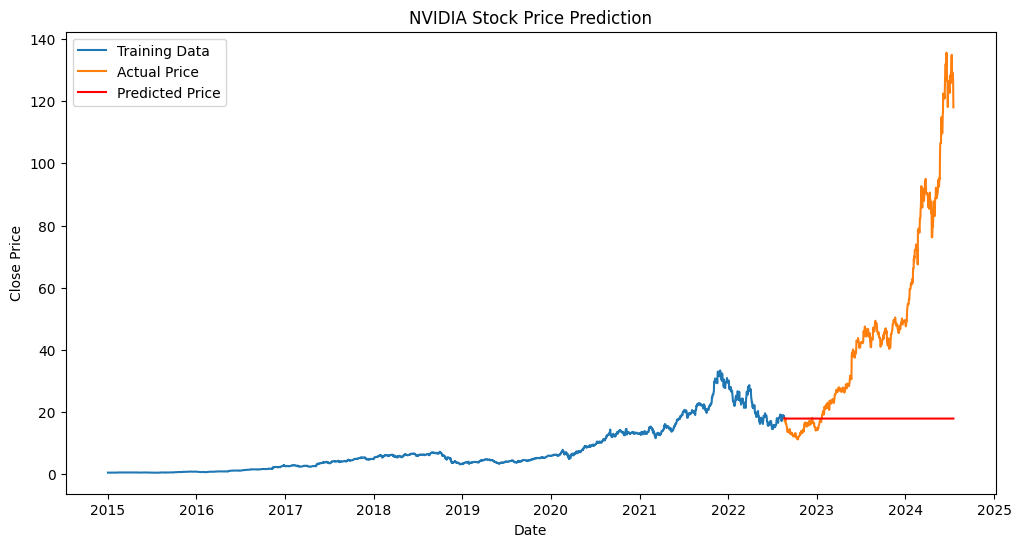

                 Date  Predicted Price
2022-08-21 2024-07-18        17.939653
2022-08-22 2024-07-19        17.881933
2022-08-23 2024-07-20        17.900735
2022-08-24 2024-07-21        17.904790
2022-08-25 2024-07-22        17.898793
2022-08-26 2024-07-23        17.901233
2022-08-27 2024-07-24        17.901087
2022-08-28 2024-07-25        17.900635
2022-08-29 2024-07-26        17.900922
2022-08-30 2024-07-27        17.900858
2022-08-31 2024-07-28        17.900833
2022-09-01 2024-07-29        17.900861
2022-09-02 2024-07-30        17.900850
2022-09-03 2024-07-31        17.900850
2022-09-04 2024-08-01        17.900852
2022-09-05 2024-08-02        17.900851
2022-09-06 2024-08-03        17.900851
2022-09-07 2024-08-04        17.900852
2022-09-08 2024-08-05        17.900851
2022-09-09 2024-08-06        17.900851
2022-09-10 2024-08-07        17.900851
2022-09-11 2024-08-08        17.900851
2022-09-12 2024-08-09        17.900851
2022-09-13 2024-08-10        17.900851
2022-09-14 2024-08-11    

In [21]:
# Plot the results
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Close'], label='Training Data')
plt.plot(test.index, test['Close'], label='Actual Price')
plt.plot(test.index, predictions, color='red', label='Predicted Price')
plt.title('NVIDIA Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Predict the next 30 days
future_predictions = model_fit.forecast(steps=30)
future_dates = pd.date_range(start=TODAY, periods=30)
future_df = pd.DataFrame({'Date': future_dates, 'Predicted Price': future_predictions})
print(future_df)